In [3]:
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# データが格納されている作業ディレクトリまでパス指定
os.chdir("/Users/naokihamaguchi/Desktop/house_price")

# csvの読み取り
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
df_train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'SalePrice'],
      dtype='object', length=271)

In [8]:
df_test.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=270)

In [14]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [15]:
df_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,896.0,0.0,0.0,2.0,468.0,144.0,0.0,0.0,270.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1329.0,0.0,0.0,3.0,923.0,0.0,0.0,0.0,406.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,928.0,701.0,0.0,3.0,791.0,0.0,0.0,0.0,137.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,926.0,678.0,0.0,3.0,602.0,0.0,0.0,0.0,324.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1280.0,0.0,0.0,2.0,263.0,0.0,0.0,0.0,1017.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [21]:
df_pickup = df_train.loc[:,['SalePrice','1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr']]
df_pickup.head()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr
0,208500,856.0,854.0,0.0,3.0
1,181500,1262.0,0.0,0.0,3.0
2,223500,920.0,866.0,0.0,3.0
3,140000,961.0,756.0,0.0,3.0
4,250000,1145.0,1053.0,0.0,4.0


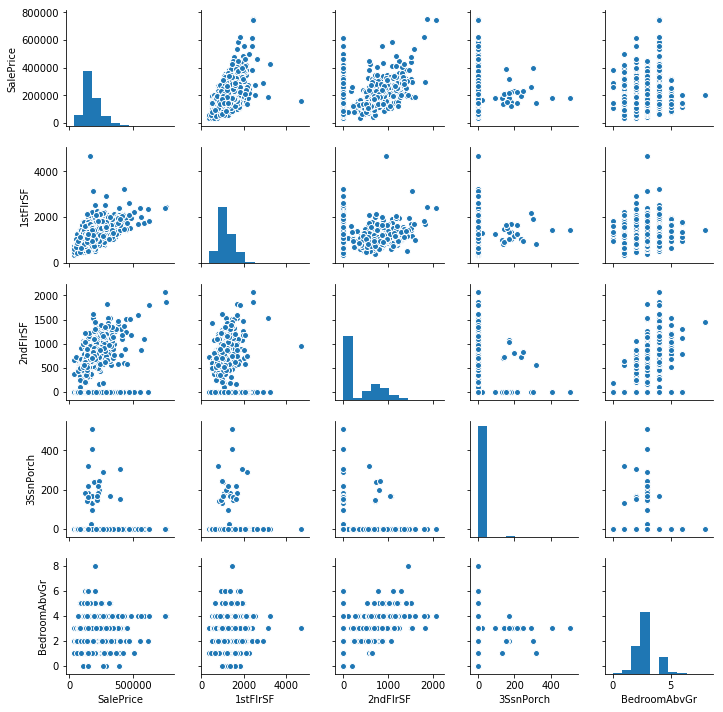

In [22]:
import seaborn as sns
sns.pairplot(df_pickup,size = 2.0)